In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dense, Dropout 
from sklearn.preprocessing import MinMaxScaler 
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import GridSearchCV

In [2]:
# change the work directory
import os
cwd = os.getcwd()
cwd
os.chdir('C:/Users/Will/Desktop/硕士资料/Data Science/final')
cwd = os.getcwd()
cwd

'C:\\Users\\Will\\Desktop\\硕士资料\\Data Science\\final'

In [3]:
# read the dataset
cpi_data = pd.read_csv('cpi_whole.csv')
ppi_data = pd.read_csv('ppi_whole.csv')

In [4]:
cpi_data = cpi_data.drop('Unnamed: 0', axis=1)

In [5]:
ppi_data = ppi_data.drop('Unnamed: 0', axis=1)

In [6]:
cpi_data.shape

(156, 152)

In [7]:
test_split=round(len(cpi_data)*0.20) 
test_split

31

In [8]:
# Then I split the data
df_for_training=cpi_data[:-31] 
df_for_testing=cpi_data[-31:] 
print(df_for_training.shape) 
print(df_for_testing.shape) 

(125, 152)
(31, 152)


In [9]:
# scale cpi data
scaler = MinMaxScaler(feature_range=(-1,1)) 
df_for_training_scaled = scaler.fit_transform(df_for_training) 
df_for_testing_scaled=scaler.transform(df_for_testing) 
df_for_training_scaled

array([[ 0.62549854, -0.79775281,  0.35185185, ...,  0.62219922,
         0.31527771,  0.33239183],
       [ 0.51391315,  1.        ,  0.35185185, ...,  0.22324802,
        -0.13637804,  0.23295761],
       [ 0.53712708,  0.57303371,  0.00740741, ...,  0.5489135 ,
         0.07614091,  0.11407946],
       ...,
       [ 0.31239149, -0.61797753, -0.33296296, ...,  0.45113382,
         0.35508179,  0.49343303],
       [ 0.19966279, -0.62921348, -0.39888889, ...,  0.41354171,
         0.14282612, -0.22545211],
       [ 0.32112175, -0.61797753, -0.34518519, ...,  0.33338853,
         0.1054689 ,  0.12268114]])

In [10]:
# split the data into X and Y
def createXY(dataset,n_past): 
    dataX = [] 
    dataY = [] 
    for i in range(n_past, len(dataset)): 
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]]) 
            dataY.append(dataset[i,0]) 
    return np.array(dataX),np.array(dataY) 
 
trainX,trainY=createXY(df_for_training_scaled,12) 
testX,testY=createXY(df_for_testing_scaled,12)

In [11]:
# take a look the dimensions of the trianX and trainY
print("trainX Shape-- ",trainX.shape) 
print("trainY Shape-- ",trainY.shape)
print("testX Shape-- ",testX.shape) 
print("testY Shape-- ",testY.shape)

trainX Shape--  (113, 12, 152)
trainY Shape--  (113,)
testX Shape--  (19, 12, 152)
testY Shape--  (19,)


In [12]:
# train model
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(12,152)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [8,10],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

C:\Users\Will\AppData\Local\Temp\ipykernel_25492\1398698306.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))


In [13]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
4/4 [==============================] - 4s 288ms/step - loss: 0.1402 - val_loss: 0.0900
Epoch 2/8
4/4 [==============================] - 0s 19ms/step - loss: 0.0508 - val_loss: 0.3368
Epoch 3/8
4/4 [==============================] - 0s 20ms/step - loss: 0.0418 - val_loss: 0.0559
Epoch 4/8
4/4 [==============================] - 0s 29ms/step - loss: 0.0246 - val_loss: 0.0286
Epoch 5/8
4/4 [==============================] - 0s 22ms/step - loss: 0.0229 - val_loss: 0.0683
Epoch 6/8
4/4 [==============================] - 0s 23ms/step - loss: 0.0244 - val_loss: 0.0947
Epoch 7/8
4/4 [==============================] - 0s 21ms/step - loss: 0.0139 - val_loss: 0.1039
Epoch 8/8
4/4 [==============================] - 0s 4ms/step - loss: 0.1070
Epoch 1/8
4/4 [==============================] - 4s 299ms/step - loss: 0.2852 - val_loss: 0.0283
Epoch 2/8
4/4 [==============================] - 0s 20ms/step - loss: 0.0959 - val_loss: 0.1132
Epoch 3/8
4/4 [==============================] - 0s 20ms/s

In [14]:
grid_search.best_params_

{'batch_size': 20, 'epochs': 10, 'optimizer': 'adam'}

In [15]:
my_model=grid_search.best_estimator_.model

In [16]:
my_model

In [17]:
prediction=my_model.predict(testX)

1/1 [==============================] - 1s 730ms/step


In [18]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[-0.11034669]
 [-0.09950677]
 [-0.11404788]
 [-0.13920423]
 [-0.1583576 ]
 [-0.17997356]
 [-0.16530232]
 [-0.16761999]
 [-0.15786697]
 [-0.12809601]
 [-0.07523564]
 [-0.01386351]
 [ 0.04851449]
 [ 0.08381105]
 [ 0.11277351]
 [ 0.15209816]
 [ 0.18533666]
 [ 0.21181372]
 [ 0.24725012]]

Prediction Shape- (19, 1)


In [19]:
prediction_copies_array = np.repeat(prediction,152, axis=-1)

In [20]:
prediction_copies_array.shape

(19, 152)

In [21]:
prediction_copies_array

array([[-0.11034669, -0.11034669, -0.11034669, ..., -0.11034669,
        -0.11034669, -0.11034669],
       [-0.09950677, -0.09950677, -0.09950677, ..., -0.09950677,
        -0.09950677, -0.09950677],
       [-0.11404788, -0.11404788, -0.11404788, ..., -0.11404788,
        -0.11404788, -0.11404788],
       ...,
       [ 0.18533666,  0.18533666,  0.18533666, ...,  0.18533666,
         0.18533666,  0.18533666],
       [ 0.21181372,  0.21181372,  0.21181372, ...,  0.21181372,
         0.21181372,  0.21181372],
       [ 0.24725012,  0.24725012,  0.24725012, ...,  0.24725012,
         0.24725012,  0.24725012]], dtype=float32)

In [22]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),152)))[:,0]

In [23]:
pred

array([-0.03001094, -0.02916364, -0.03030025, -0.0322666 , -0.03376373,
       -0.03545335, -0.03430657, -0.03448773, -0.03372538, -0.03139832,
       -0.02726647, -0.0224693 , -0.0175935 , -0.01483454, -0.01257068,
       -0.00949685, -0.00689875, -0.00482917, -0.00205927], dtype=float32)

In [24]:
original_copies_array = np.repeat(testY,152, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),152)))[:,0]

In [25]:
pred

array([-0.03001094, -0.02916364, -0.03030025, -0.0322666 , -0.03376373,
       -0.03545335, -0.03430657, -0.03448773, -0.03372538, -0.03139832,
       -0.02726647, -0.0224693 , -0.0175935 , -0.01483454, -0.01257068,
       -0.00949685, -0.00689875, -0.00482917, -0.00205927], dtype=float32)

In [26]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [-0.03001094 -0.02916364 -0.03030025 -0.0322666  -0.03376373 -0.03545335
 -0.03430657 -0.03448773 -0.03372538 -0.03139832 -0.02726647 -0.0224693
 -0.0175935  -0.01483454 -0.01257068 -0.00949685 -0.00689875 -0.00482917
 -0.00205927]

Original Values--  [-0.00932614 -0.00627638 -0.00029419 -0.00029523 -0.00325332  0.00049278
  0.00127984  0.00977737  0.00834525  0.00903384  0.00804557  0.00796974
  0.00482118  0.00117983 -0.00609938  0.00314466  0.00816251  0.00746052
  0.00431966]


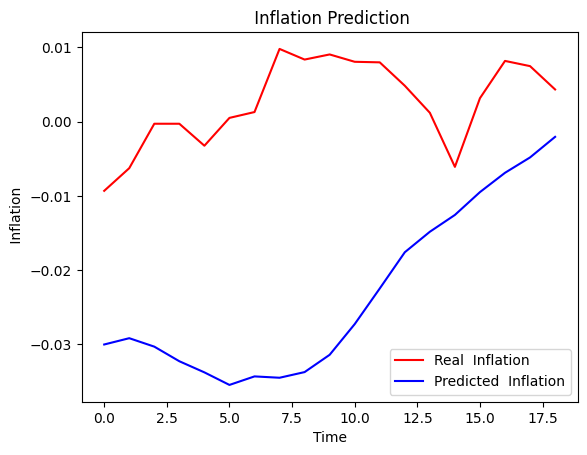

In [27]:
plt.plot(original, color = 'red', label = 'Real  Inflation')
plt.plot(pred, color = 'blue', label = 'Predicted  Inflation')
plt.title(' Inflation Prediction')
plt.xlabel('Time')
plt.ylabel(' Inflation')
plt.legend()
plt.show()

In [28]:
import statistics
rss = (statistics.variance(original - pred))
tss = (statistics.variance(original))
oos_r2 = 1 - rss/tss
print(rss)
print(tss)
print(oos_r2)

0.00014289120932892428
3.350206605696509e-05
-3.2651461878786767


(125, 152)
(31, 152)


C:\Users\Will\AppData\Local\Temp\ipykernel_25492\680691454.py:26: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX1,testY1))


Epoch 1/8
4/4 [==============================] - 5s 271ms/step - loss: 0.1876 - val_loss: 0.1722
Epoch 2/8
4/4 [==============================] - 0s 21ms/step - loss: 0.0517 - val_loss: 0.2461
Epoch 3/8
4/4 [==============================] - 0s 18ms/step - loss: 0.0473 - val_loss: 0.1964
Epoch 4/8
4/4 [==============================] - 0s 18ms/step - loss: 0.0280 - val_loss: 0.2511
Epoch 5/8
4/4 [==============================] - 0s 19ms/step - loss: 0.0220 - val_loss: 0.2112
Epoch 6/8
4/4 [==============================] - 0s 18ms/step - loss: 0.0206 - val_loss: 0.2406
Epoch 7/8
4/4 [==============================] - 0s 19ms/step - loss: 0.0157 - val_loss: 0.3073
Epoch 8/8
4/4 [==============================] - 0s 5ms/step - loss: 0.0783
Epoch 1/8
4/4 [==============================] - 4s 271ms/step - loss: 0.1888 - val_loss: 0.4265
Epoch 2/8
4/4 [==============================] - 0s 25ms/step - loss: 0.0661 - val_loss: 0.7270
Epoch 3/8
4/4 [==============================] - 0s 34ms/s

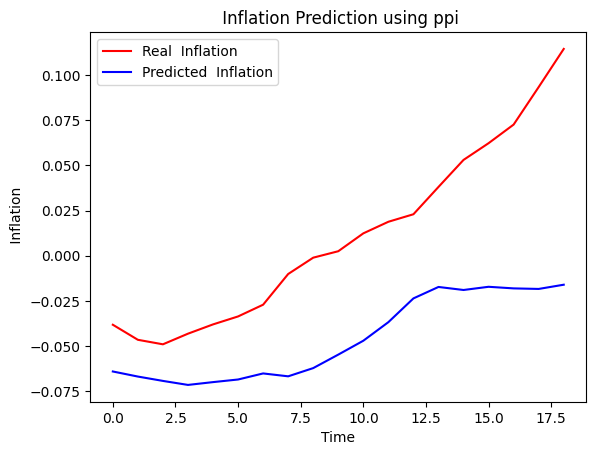

0.0009065746025852889
0.002515817746558737
0.6396501281440805


In [29]:
# Then I use the same way to run LSTM to ppi data
df_for_training1=ppi_data[:-31] 
df_for_testing1=ppi_data[-31:] 
print(df_for_training1.shape) 
print(df_for_testing1.shape) 

# scale ppi data
df_for_training_scaled1 = scaler.fit_transform(df_for_training1) 
df_for_testing_scaled1=scaler.transform(df_for_testing1) 

# split the data into X and Y
trainX1,trainY1=createXY(df_for_training_scaled1,12) 
testX1,testY1=createXY(df_for_testing_scaled1,12)

# train model
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(12,152)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX1,testY1))
parameters = {'batch_size' : [16,20],
              'epochs' : [8,10],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

grid_search1 = grid_search.fit(trainX1,trainY1)
grid_search1.best_params_

my_model1=grid_search1.best_estimator_.model

# predict
prediction1=my_model1.predict(testX1)

# inverse the prediction to before scaling
prediction_copies_array1 = np.repeat(prediction1,152, axis=-1)
pred1=scaler.inverse_transform(np.reshape(prediction_copies_array1,(len(prediction1),152)))[:,0]

# inverse the y to before scaling
original_copies_array1 = np.repeat(testY1,152, axis=-1)

original_copies_array1.shape

original1=scaler.inverse_transform(np.reshape(original_copies_array1,(len(testY1),152)))[:,0]

# plot the graph to see the difference
plt.plot(original1, color = 'red', label = 'Real  Inflation')
plt.plot(pred1, color = 'blue', label = 'Predicted  Inflation')
plt.title(' Inflation Prediction using ppi')
plt.xlabel('Time')
plt.ylabel(' Inflation')
plt.legend()
plt.show()

# calculate the oos-r2
import statistics
rss1 = (statistics.variance(original1 - pred1))
tss1 = (statistics.variance(original1))
oos_r21 = 1 - rss1/tss1
print(rss1)
print(tss1)
print(oos_r21)

# The later part is another way to do LSTM

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
# scale cpi data
scaler = StandardScaler()
cpi_scaler = scaler.fit(cpi_data)
cpi_scaled = cpi_scaler.transform(cpi_data)

In [35]:
# scale ppi data
scaler = StandardScaler()
ppi_scaler = scaler.fit(ppi_data)
ppi_scaled = ppi_scaler.transform(ppi_data)

In [36]:
#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of months we want to look into the future based on the past days.
n_past = 12  # Number of past months we want to use to predict the future.

In [37]:
print(cpi_scaled.shape)
print(ppi_scaled.shape)
len(cpi_scaled)
len(ppi_scaled)

(156, 152)
(156, 152)


156

In [38]:
#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my case, my cpi_scaled has a shape (156, 153)
#156 refers to the number of data points and 153 refers to the columns (multi-variables).
for i in range(n_past, len(cpi_scaled) - n_future +1):
    trainX.append(cpi_scaled[i - n_past:i, 0:cpi_scaled.shape[1]])
    trainY.append(cpi_scaled[i + n_future - 1:i + n_future, 0])

In [39]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [40]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (144, 12, 152).
trainY shape == (144, 1).


In [41]:
# define the Autoencoder model

model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(5, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_68 (LSTM)              (None, 12, 10)            6520      
                                                                 
 lstm_69 (LSTM)              (None, 5)                 320       
                                                                 
 dropout_34 (Dropout)        (None, 5)                 0         
                                                                 
 dense_34 (Dense)            (None, 1)                 6         
                                                                 
Total params: 6,846
Trainable params: 6,846
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
11/11 [==============================] - 5s 56ms/step - loss: 0.8795 - val_loss: 0.1029
Epoch 2/5
11/11 [==============================] - 0s 9ms/step - loss: 0.6885 - val_loss: 0.1813
Epoch 3/5
11/11 [==============================] - 0s 10ms/step - loss: 0.4849 - val_loss: 0.2539
Epoch 4/5
11/11 [==============================] - 0s 10ms/step - loss: 0.3904 - val_loss: 0.2092
Epoch 5/5
11/11 [==============================] - 0s 10ms/step - loss: 0.3073 - val_loss: 0.1886


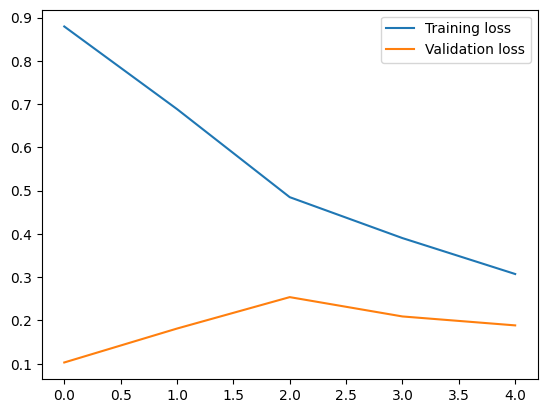

In [42]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=12, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [43]:
n_months_for_prediction = 12

In [44]:
prediction = model.predict(trainX[-n_months_for_prediction:])

1/1 [==============================] - 0s 317ms/step


In [45]:
print(prediction)

[[-0.3266407 ]
 [-0.26702008]
 [-0.29889   ]
 [-0.29672986]
 [-0.29363555]
 [-0.26083046]
 [-0.24526426]
 [-0.2809921 ]
 [-0.2960845 ]
 [-0.30251193]
 [-0.2959523 ]
 [-0.26184583]]


In [46]:
#Perform inverse transformation to rescale back to original range
#Since we used 153 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 153 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, cpi_scaled.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [47]:
print(y_pred_future)

[-0.02273908 -0.01910579 -0.02104795 -0.02091631 -0.02072774 -0.01872859
 -0.01777999 -0.01995725 -0.02087698 -0.02126867 -0.02086893 -0.01879047]


In [48]:
lncpi = cpi_data.iloc[:,0]
true_values = lncpi[-12:]
print(true_values)

144    0.009777
145    0.008345
146    0.009034
147    0.008046
148    0.007970
149    0.004821
150    0.001180
151   -0.006099
152    0.003145
153    0.008163
154    0.007461
155    0.004320
Name: lncpi, dtype: float64


In [49]:
# calculate the oos-r2
rss_new = (statistics.variance(true_values - y_pred_future))
tss_new = (statistics.variance(true_values))
oos_r2_new = 1 - rss_new/tss_new
print(rss_new)
print(tss_new)
print(oos_r2_new)

2.8088888101266596e-05
2.0272771408086218e-05
-0.38554751769473206


## Then I change the data to be ppi

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_70 (LSTM)              (None, 12, 10)            6520      
                                                                 
 lstm_71 (LSTM)              (None, 5)                 320       
                                                                 
 dropout_35 (Dropout)        (None, 5)                 0         
                                                                 
 dense_35 (Dense)            (None, 1)                 6         
                                                                 
Total params: 6,846
Trainable params: 6,846
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
11/11 [==============================] - 3s 64ms/step - loss: 0.9234 - val_loss: 1.1897
Epoch 2/5
11/11 [==============================] - 0s 9ms/step - loss: 0.5381 - val_l

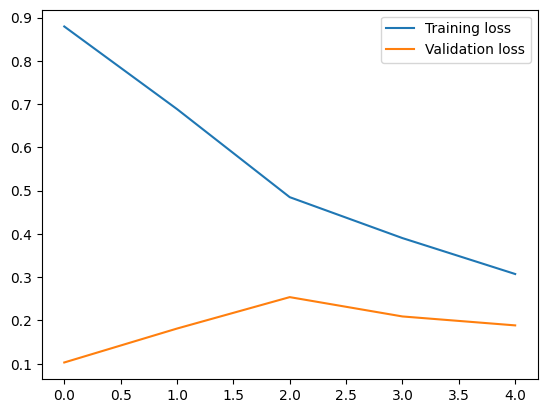

In [50]:
#Reformat input data into a shape: (n_samples x timesteps x n_features)
trainX1 = []
trainY1 = []
for i in range(n_past, len(ppi_scaled) - n_future +1):
    trainX1.append(ppi_scaled[i - n_past:i, 0:ppi_scaled.shape[1]])
    trainY1.append(ppi_scaled[i + n_future - 1:i + n_future, 0])

trainX1, trainY1 = np.array(trainX1), np.array(trainY1)

# define the Autoencoder model
model1 = Sequential()
model1.add(LSTM(10, activation='relu', input_shape=(trainX1.shape[1], trainX1.shape[2]), return_sequences=True))
model1.add(LSTM(5, activation='relu', return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(trainY1.shape[1]))

model1.compile(optimizer='adam', loss='mse')
model1.summary()

# fit the model
history1 = model1.fit(trainX1, trainY1, epochs=5, batch_size=12, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# predict
prediction1 = model1.predict(trainX1[-n_months_for_prediction:])

# inverse the scaled predicted values
prediction_copies1 = np.repeat(prediction1, ppi_scaled.shape[1], axis=-1)
y_pred_future1 = scaler.inverse_transform(prediction_copies1)[:,0]

# get the true values
lnppi = ppi_data.iloc[:,0]
true_values1 = lnppi[-12:]

## calculate the oos-r2
rss_new1 = (statistics.variance(true_values1 - y_pred_future1))
tss_new1 = (statistics.variance(true_values1))
oos_r2_new1 = 1 - rss_new1/tss_new1
print(rss_new1)
print(tss_new1)
print(oos_r2_new1)